In [63]:
import numpy as np
p = 500 # Number of dimensions
n0 = 150 # Number of in-control samples
n1 = 150 # Number of out-of-control samples
Tmax = n0+n1
delta = 1 # Change magnitude
c = 1 # Target meanshift is c * M
k = 50 # Number of failuer Mode
sel_failure_mode = [0,1]
M = np.kron(np.eye(k),np.ones((int(p/k),1))) # Mean Failure Modes
Ks = 5

nsensors = 5

In [64]:
def data_gen_func0(n_batch, Tmax, seed):
    # Generate normal samples
    np.random.seed(seed)    
    data = np.random.randn(n_batch,Tmax,p)
    return data

def data_gen_func1(n_batch, Tmax, seed, T0, delta):
    # Generate abnormal samples
    np.random.seed(seed)
    data = np.random.randn(n_batch, Tmax, p)
    data[:,T0:,:] = data[:,T0:,:] + np.sum(M[:,sel_failure_mode]*delta,1)
    return data


In [65]:
from ExtendedTSSRP import ExtendedTSSRP
from TSSRP import TSSRP
from Oracle import Oracle
from spc import spc
truesensidx = np.arange(nsensors)
nmodels = 3
model_all = [[] for i in range(nmodels)]

model_all[0] = ExtendedTSSRP(p, c, k,M,nsensors,Ks)
model_all[1] = TSSRP(p, c, k,M,nsensors,Ks)
model_all[2] = Oracle(truesensidx, p, c, k, M, nsensors, Ks, L=-1)
model_name = ['ETSSRP_srp_model','TSSRP_srp_model','orcale_model']


### Phase I Analysis 

In [66]:
spc_model_all = [[] for i in range(nmodels)]
L = np.zeros(nmodels)
n_batch_phaseI = 20
ARL0 = 200
Tmax = 500
seed_list = np.arange(10)
for i,imodel in enumerate(model_all): 
    print(model_name[i])
    monitor_statistics = lambda x, T0, L: imodel.compute_monitor_batch(x,T0, L)
    spc_model_all[i] = spc(monitor_statistics,data_gen_func0, data_gen_func1)
    L[i] = spc_model_all[i].phase1(n_batch_phaseI, Tmax, seed_list,r=1000,ARL0=ARL0)
    
import pickle
PIK = "L.pickle"
with open(PIK, "wb") as f:
    pickle.dump(L, f)

ETSSRP_srp_model


KeyboardInterrupt: 

### Phase II Analysis 


In [52]:
delta_all =  [0,0.1,0.2,0.3,0.4,0.5,0.6,0.8,1,1.2,1.5,1.8,2,3,4]
lendelta = len(delta_all)
n_batch = 20
ARL_all = np.zeros((nmodels,lendelta))
for i,imodel in enumerate(model_all): 
    print(model_name[i])    
    for j,jdelta in enumerate(delta_all):
        print(jdelta)
        T_all, RL = spc_model_all[i].phase2( n_batch, Tmax, np.arange(100,110), 20, delta=jdelta)
        ARL_all[i,j] = np.mean(RL)

import pickle
PIK = "ARL.pickle"
with open(PIK, "wb") as f:
    pickle.dump(ARL_all, f)

ETSSRP_srp_model
0



0.1



0.2



0.3



0.4



0.5



0.6



0.8



1



1.2



1.5



1.8



2



3



4



TSSRP_srp_model
0



0.1



0.2



0.3



0.4



0.5



0.6



0.8



1



1.2



1.5



1.8



2



3



4



orcale_model
0



0.1



0.2



0.3



0.4



0.5



0.6



0.8



1



1.2



1.5



1.8



2



3



4


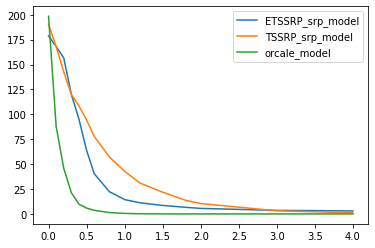

In [70]:
import numpy as np
import pickle
ARL_all = pickle.load( open( "ARL.pickle", "rb" ) )
 
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(nmodels):
    plt.plot(delta_all,ARL_all[i],label=model_name[i])
    plt.legend()

In [75]:
ARL_all[:,-3]

array([ 5.545, 10.425,  0.   ])